In [31]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import requests
import textwrap

states_geojson = requests.get(
    "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_1_states_provinces_lines.geojson"
).json()


df = px.data.gapminder().query("year == 2007")

In [32]:
data=pd.read_excel('DSO participants all years.xlsx')

In [33]:
data['name']=data.first_name + ' ' + data.last_name
data=data.rename(columns={"college_name": "College", "program_year": "Program Year", "city_from": "From"})
data['Program Year']=data['Program Year'].astype(int).astype(str)

In [34]:
data['Testimonial']=data['Testimonial'].astype(str).apply(
    lambda t: "<br>".join(textwrap.wrap(t))
)
data['Testimonial']=data['Testimonial'].replace('nan','')

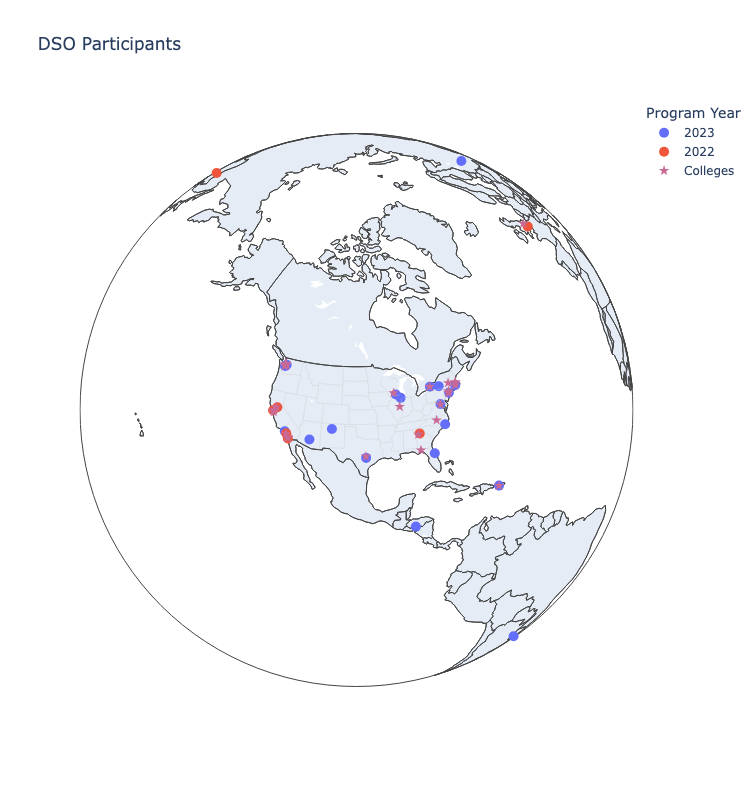

In [35]:
fig = px.scatter_geo(data,
                     lat='city_from_lat',lon='city_from_long', color='Program Year',
                     hover_name='name', 
                     hover_data={'city_from_lat':False,'city_from_long':False, 'College':True,'From':True,'Program Year':False,'college_lat':False,'college_long':False,'name':False, 'Testimonial': True}, 
                     height=800, width=1200, title="DSO Participants");

#fig.update_geos(resolution=50, showrivers=False, showcountries=True, showlakes=True, scope='usa')
fig.update_geos(projection_rotation_lon=-100, projection_rotation_lat=40)
fig.update_geos(resolution=110, showrivers=False, showcountries=True, showlakes=True, projection_type='orthographic')
fig.update_traces(marker=dict(size=10))
#fig.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True)

#fig.update(layout_coloraxis_showscale=False)
#fig.show(renderer="colab")  #specify the renderer if you're using google colab




fig.add_trace(
    go.Scattergeo(
        lat=[
            v
            for sub in [
                np.array(f["geometry"]["coordinates"])[:, 1].tolist() + [None]
                for f in states_geojson["features"]
            ]
            for v in sub
        ],
        lon=[
            v
            for sub in [
                np.array(f["geometry"]["coordinates"])[:, 0].tolist() + [None]
                for f in states_geojson["features"]
            ]
            for v in sub
        ],
        line=dict(
                        color='rgba(204, 204, 204, 0.4)',
                        width=1
                    ),
        mode="lines",
        hoverinfo='skip',
        showlegend=False,
    )
)

fig.add_scattergeo(lat=data['college_lat'],lon=data['college_long']
                      ,marker_size = 8
                      ,name='Colleges'
                      ,hoverinfo='location+text'
                      ,text = data['College']
                      ,marker_color = 'rgb(200, 105, 150)' # blue
                      ,marker_symbol = 'star'
                      ,showlegend = True
                     )


fig.write_html('participants.html')
fig.show()

In [29]:
fig = px.scatter_geo(data,
                     lat={data['college_lat'][8]},lon={data['college_long'][8]})
fig.show()

TypeError: 'set' type is unordered

In [30]:
data['college_lat'][8]

38.89845